In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data_Train.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

<strong>As there are only two null values in our dataset, we can drop them</strong>

In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


<h2>Featrure Engineering</h2>

<h3>Feature Transformation of Date_of_Journey Cloumn</h3>

In [7]:
data.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [9]:
data.Date_of_Journey[0].split('/')[0]

'24'

In [11]:
journey_day = []
journey_month = []
journey_year = []
for date in data.Date_of_Journey:
    day = int(date.split('/')[0])
    month = int(date.split('/')[1])
    year = int(date.split('/')[2])
    journey_day.append(day)
    journey_month.append(month)
    journey_year.append(year)
    
data['Journey_day'] = journey_day
data['Journey_month'] = journey_month
data['Journey_year'] = journey_year

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


<strong>We can now drop Date_of_Journey Column</strong>

In [12]:
data = data.drop(columns=['Date_of_Journey'])

In [13]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


<h3>Feature Transformation of Route Column</h3>

<strong>We are gonna split each entry in route column by '→', and then if the length of splitted list is 3, then there is one stop and we add that to the first stop column, if the length is 4 , then we add that to second stop column and so on.</strong>

In [15]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

As there are only 4 maximum stops, we need to do the steps mentioned above 4 times

In [18]:
stop_1 = []
stop_2 = []
stop_3 = []
stop_4 = []
for route in data.Route:
    rl = route.split('→')
    if len(rl)==2:
        stop_1.append(np.nan)
        stop_2.append(np.nan)
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==3:
        stop_1.append(rl[1])
        stop_2.append(np.nan)
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==4:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==5:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(rl[3])
        stop_4.append(np.nan)
    if len(rl)==6:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(rl[3])
        stop_4.append(rl[4])
        
data['stop_1'] = stop_1
data['stop_2'] = stop_2
data['stop_3'] = stop_3
data['stop_4'] = stop_4

data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN


<strong>We can now drop the Route Column</strong>

In [ ]:
data = data.drop(columns=['Route'])


In [21]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN


In [22]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_day            0
Journey_month          0
Journey_year           0
stop_1              3491
stop_2              9116
stop_3             10636
stop_4             10681
dtype: int64

<h3>Feature Transformation of Dep_time Column</h3>

<strong>We will split the entries in Dep_time column, the 0 index will be added in hour and 1 index will be added in minute</strong>

In [24]:
hours = []
mins = []
for time in data.Dep_Time:
    time = time.split(':')
    hours.append(int(time[0]))
    mins.append(int(time[1]))
    
data['Dep_hour'] = hours
data['Dep_min'] = mins
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50


<strong>We can now drop the Dep_Time column</strong>

In [25]:
data = data.drop(columns=['Dep_Time'])
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50


<h3>Feature Transformation of Arrival_Time column</h3>

<strong>We will first split each entry by ' ' and if  length of that variable is more than 1 , then the flight will reach the next day,  then we will split the 0 index values by ':', as we din in Dep_Time Column<strong>

In [34]:
Same_day = []
Arrival_Hour = []
Arrival_Minute = []

for arr in data.Arrival_Time:
    arr = arr.split(' ')
    if len(arr)>1:
        Same_day.append(0)
    else:
        Same_day.append(1)
        
    Arrival_Hour.append(int(arr[0].split(':')[0]))
    Arrival_Minute.append(int(arr[0].split(':')[1]))
    
data['Same_day'] = Same_day
data['Arrival_Hour'] = Arrival_Hour
data['Arrival_Minute'] = Arrival_Minute

data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20,0,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50,1,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25,0,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50,1,21,35


<strong>We can now drop the Arrival_Time column</strong>

In [35]:
data = data.drop(columns=['Arrival_Time'])
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20,0,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50,1,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25,0,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50,1,21,35


<h3>Feautre Transformation of Duration Column</h3>

<strong>We will split by ' ', then the 0 index value will be splitted by h, and the first index value will be splitted by m, and then the hour will be multiplied by 60 and the the minute value will be added to that</strong>

In [40]:
Duration = []
for dur in data.Duration:
    dur = dur.split(' ')
    if len(dur)==1:
        try:
            hour = int(dur[0].split('h')[0])
            dur = (hour*60)
        except:
            mins = int(dur[0].split('m')[0])
            dur = mins
    else:
        hour = int(dur[0].split('h')[0])
        mins = int(dur[1].split('m')[0])
        dur = (hour*60) +mins
    
    Duration.append(dur)
    
data['Duration'] = Duration

In [41]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20,0,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50,1,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25,0,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50,1,21,35


<h3>Feature Transformation of Total_Stops column</h3>

In [42]:
data['Total_Stops'] = data['Total_Stops'].replace({
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
})

data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,2019,NaN,NaN,NaN,NaN,22,20,0,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2019,IXR,BBI,NaN,NaN,5,50,1,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,2019,LKO,BOM,NaN,NaN,9,25,0,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,2019,NAG,NaN,NaN,NaN,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,2019,NAG,NaN,NaN,NaN,16,50,1,21,35


<h2>Exploratory Data Analysis</h2>

In [43]:
cat_cols = [col for col in data.columns if data[col].dtype=='object']

In [44]:
num_cols = [col for col in data.columns if col not in cat_cols]

In [47]:
cat_cols.append('Same_day')
num_cols.remove('Same_day')

In [48]:
num_cols

['Duration',
 'Total_Stops',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Dep_hour',
 'Dep_min',
 'Arrival_Hour',
 'Arrival_Minute']

In [49]:
cat_cols

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'stop_1',
 'stop_2',
 'stop_3',
 'stop_4',
 'Same_day']

<h3>ScatterPlots</h3>

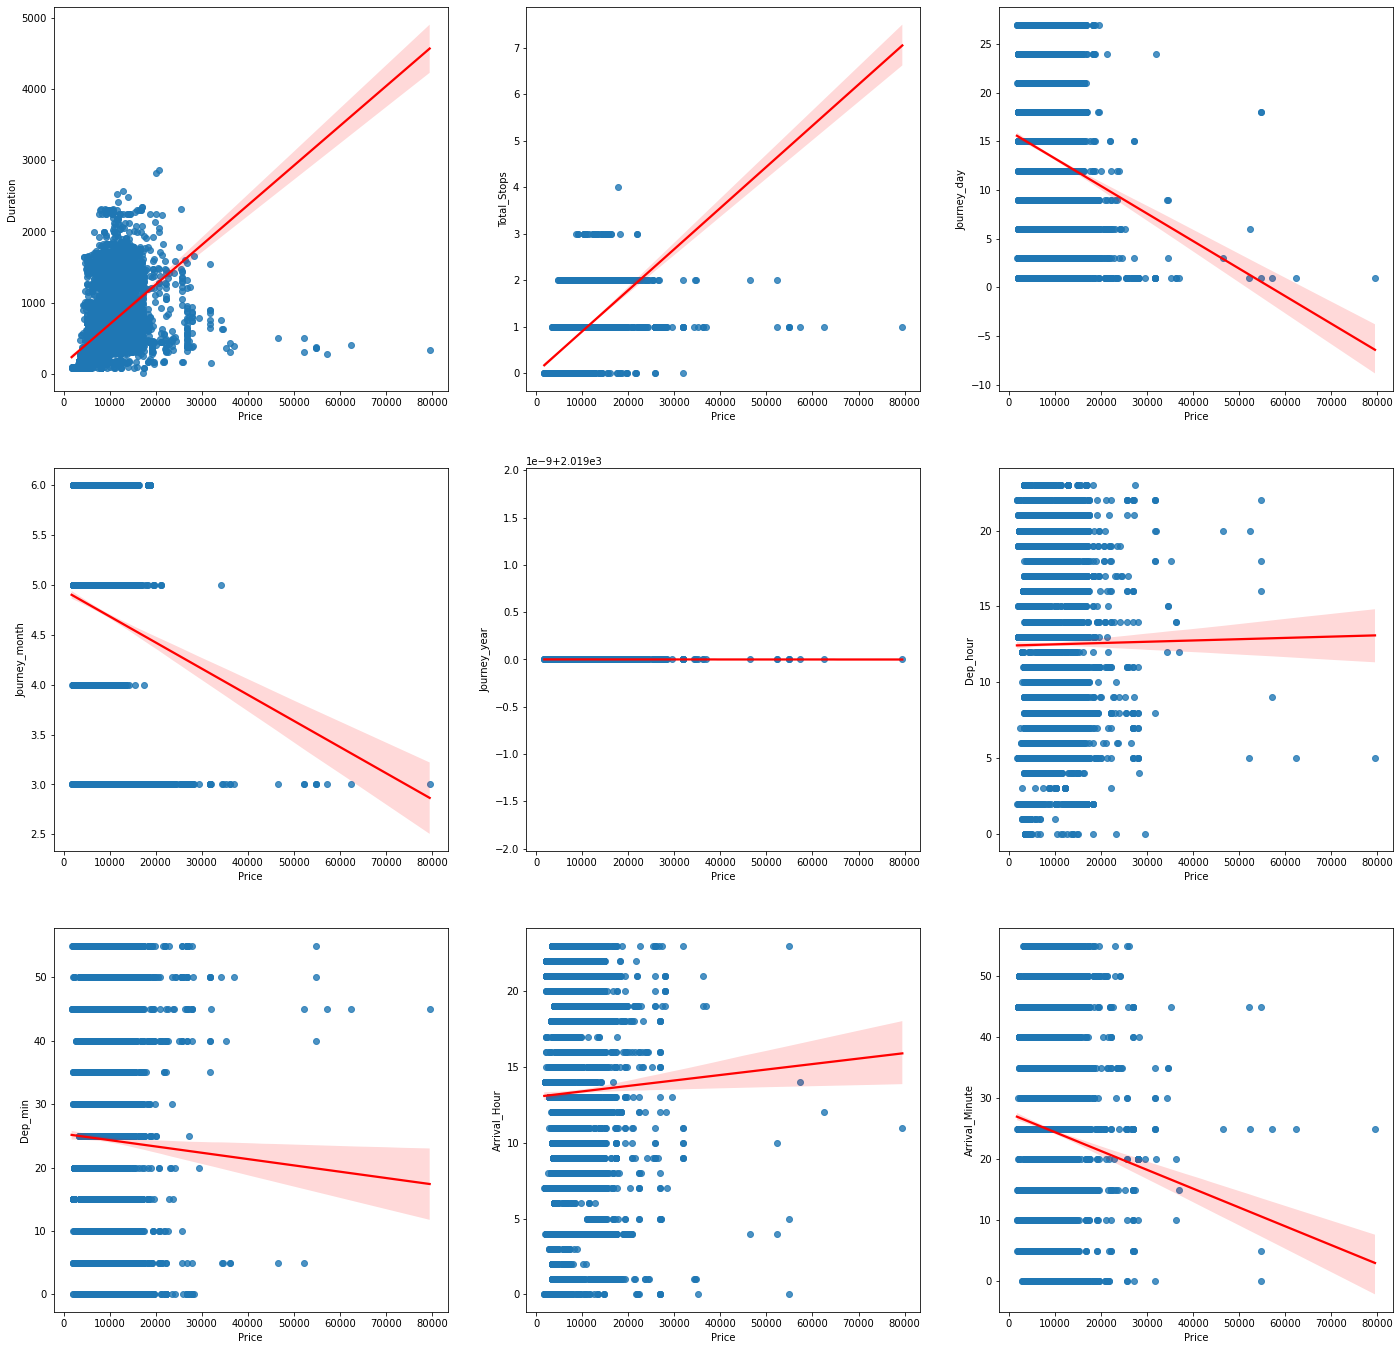

In [52]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    if col=='Price':
        continue
    plt.subplot(3,3, plotnumber)
    sns.regplot('Price', col, data=data, line_kws={'color':'red'})
    plotnumber+=1

<strong>Duration and Total_stops follow an upward trend with price</strong>
<strong>Journey_day and Journey_Month follow downward trend with price</strong>

<strong>As there is only one value in journey_year column, we can drop that column</strong>

In [55]:
data = data.drop(columns=['Journey_year'])

In [56]:
num_cols.remove('Journey_year')

<h3>StripPlots</h3>

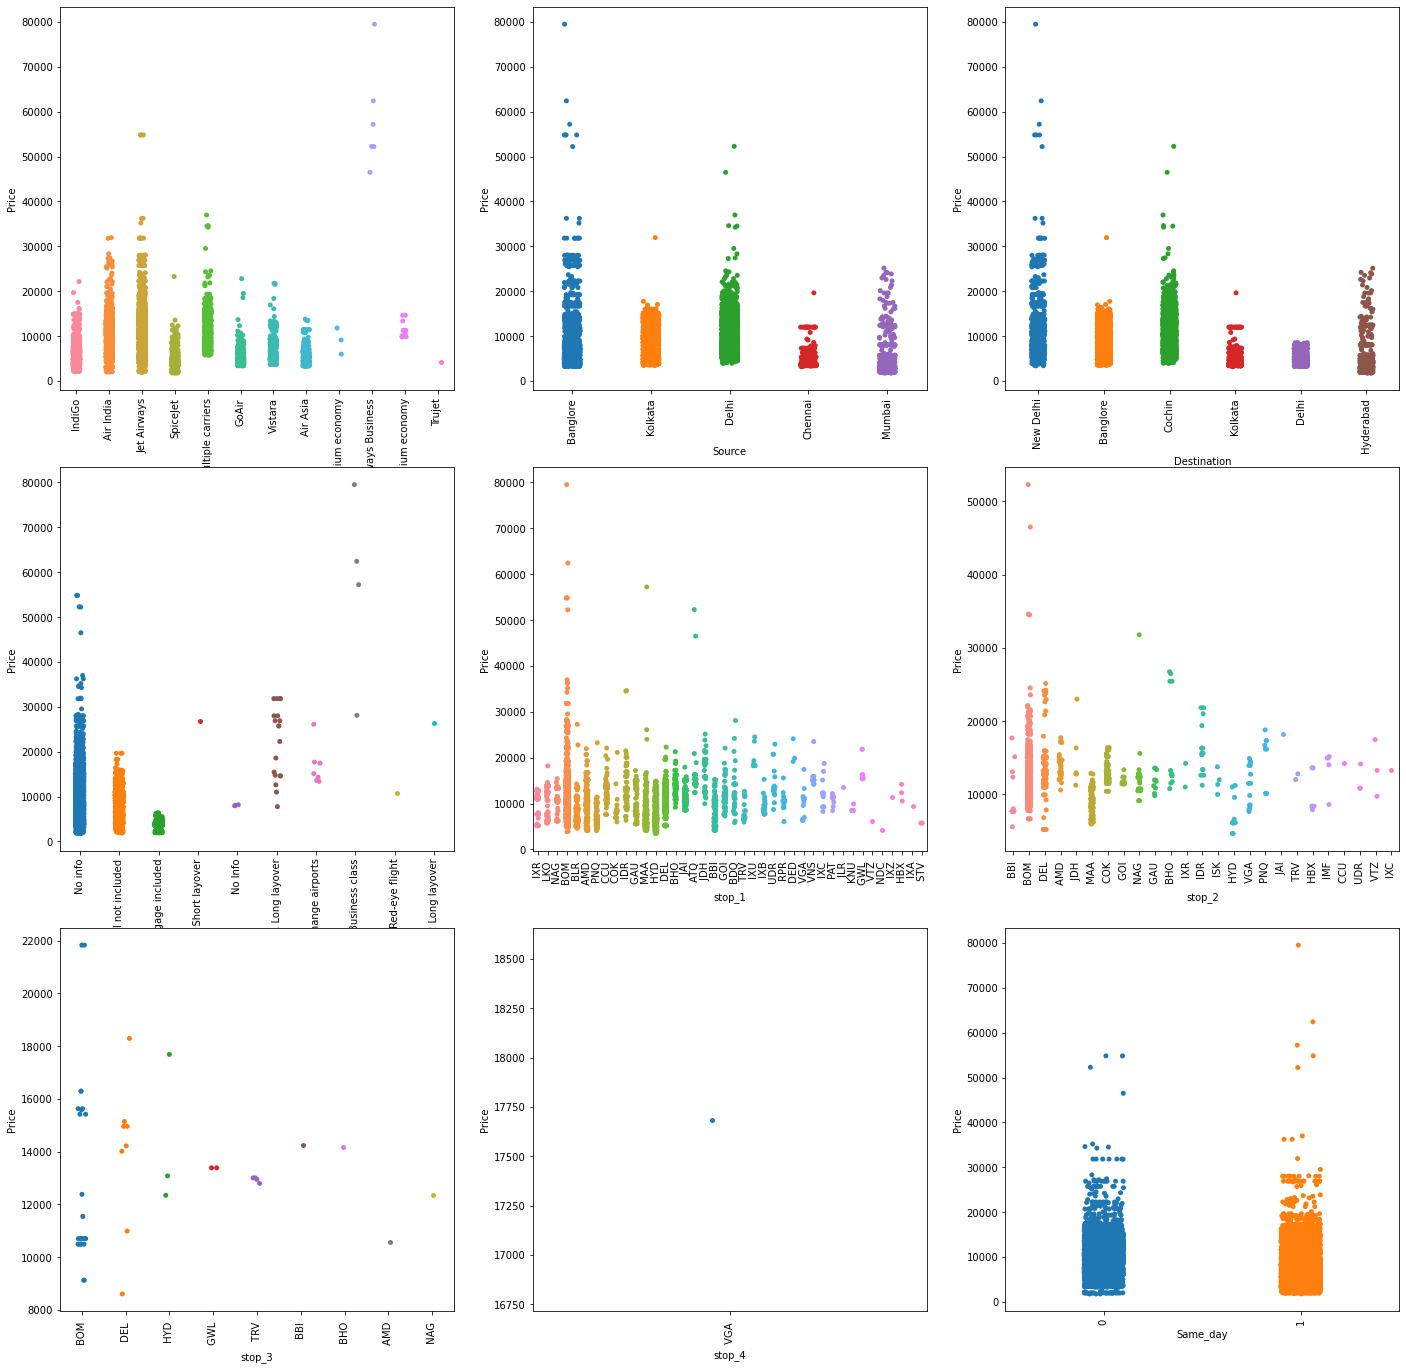

In [63]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in cat_cols:
    
    plt.subplot(3,3,plotnumber)
    sns.stripplot(col, 'Price', data=data)
    plt.xticks(rotation='vertical')
    plotnumber+=1

<h3>KDEPlot</h3>

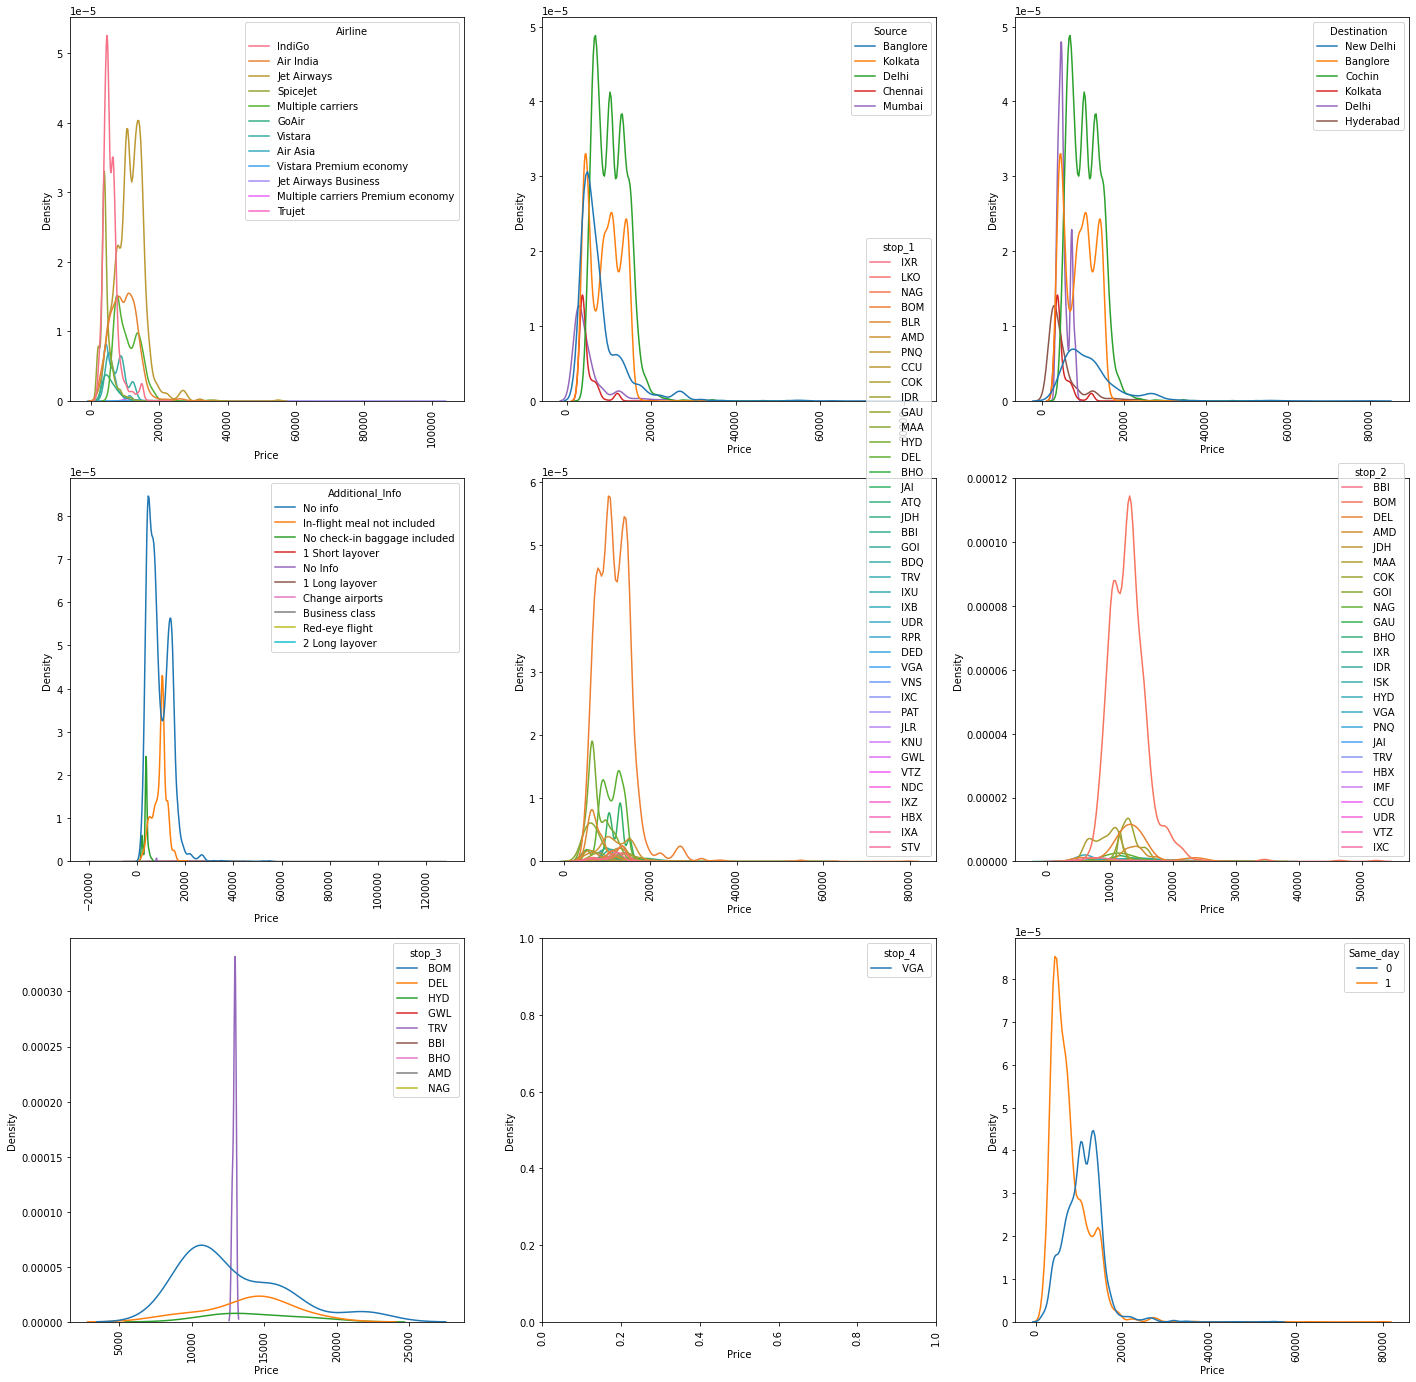

In [62]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in cat_cols:
    
    plt.subplot(3,3,plotnumber)
    sns.kdeplot('Price',data=data, hue=col)
    plt.xticks(rotation='vertical')
    plotnumber+=1

<strong>If flight arrives on same day, the price is low</strong>

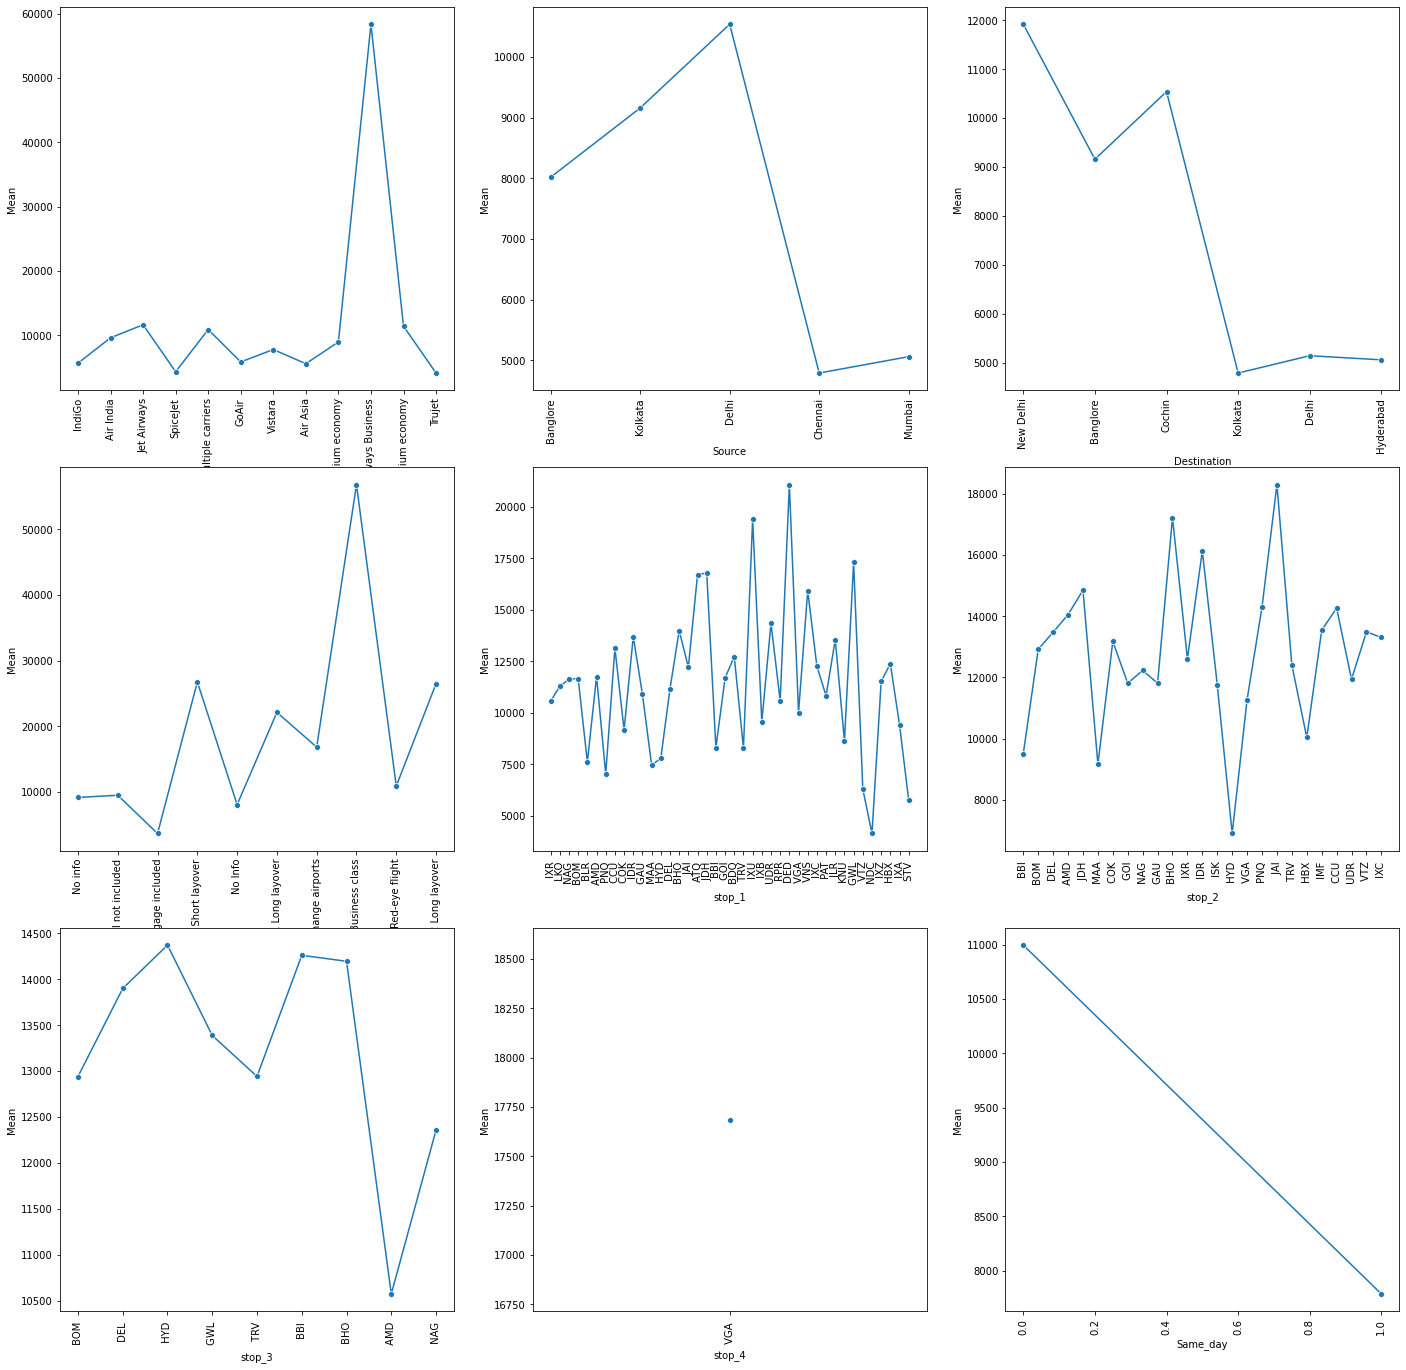

In [61]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in cat_cols:
    mean_vals = pd.DataFrame()
    unique_val = data[col].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data[col] == val]
        mean_val = mean_val['Price'].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plt.xticks(rotation='vertical')
    plotnumber+=1

<strong>Jet Airyways business has higher price compared to others<br> Chennai and Mumbai have lowest price as source<br> Delhi has highest price as source<br> Kolkata, Delgi and Hyderabad have low price as destination <br> New Delhi has hgih price as destination</strong>

<h2>Correlation Matrix</h2>

In [64]:
data.corr()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
Duration,1.000000,0.738071,0.506480,-0.022439,0.014836,0.002088,-0.019099,-0.666140,0.051531,-0.069663
Total_Stops,0.738071,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,-0.463627,0.038140,-0.106940
Price,0.506480,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,-0.341905,0.024244,-0.086155
Journey_day,-0.022439,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,0.017119,-0.003245,-0.017510
Journey_month,0.014836,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.036683,-0.003927,-0.100626
Dep_hour,0.002088,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,-0.470343,0.005180,0.067911
Dep_min,-0.019099,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.018132,0.043122,-0.017597
Same_day,-0.666140,-0.463627,-0.341905,0.017119,-0.036683,-0.470343,0.018132,1.000000,0.524708,-0.047887
Arrival_Hour,0.051531,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,0.524708,1.000000,-0.154363
Arrival_Minute,-0.069663,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.047887,-0.154363,1.000000


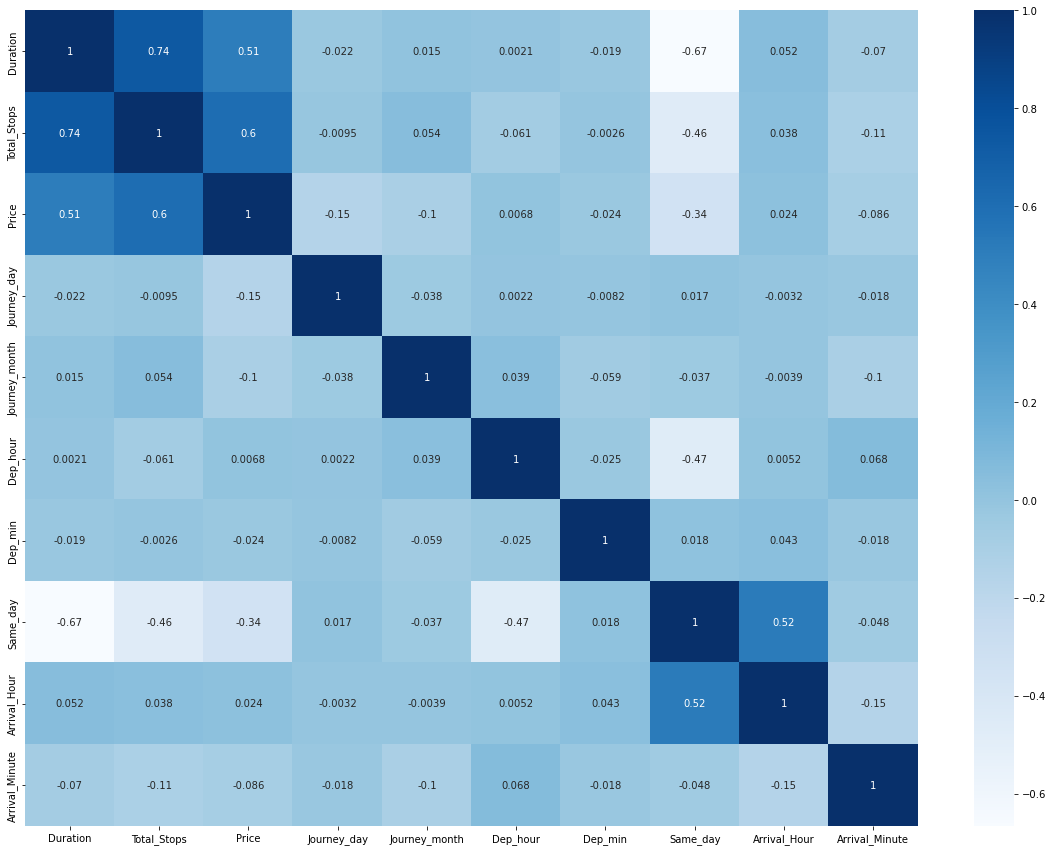

In [66]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>Total stops has 74% corrleation with duration<br> Price has 51% correlation with duration and 60% correlation with total stops</strong>
<strong>Duration has -67% correlation with same day</strong>

<h2>Descriptvie Statistics</h2>

In [67]:
data.describe()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,0.594271,13.349186,24.690601
std,507.830133,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,0.491056,6.859317,16.506808
min,5.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,0.000000,8.000000,10.000000
50%,520.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,1.000000,14.000000,25.000000
75%,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,1.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,1.000000,23.000000,55.000000


<h2>Correlation Matrix</h2>

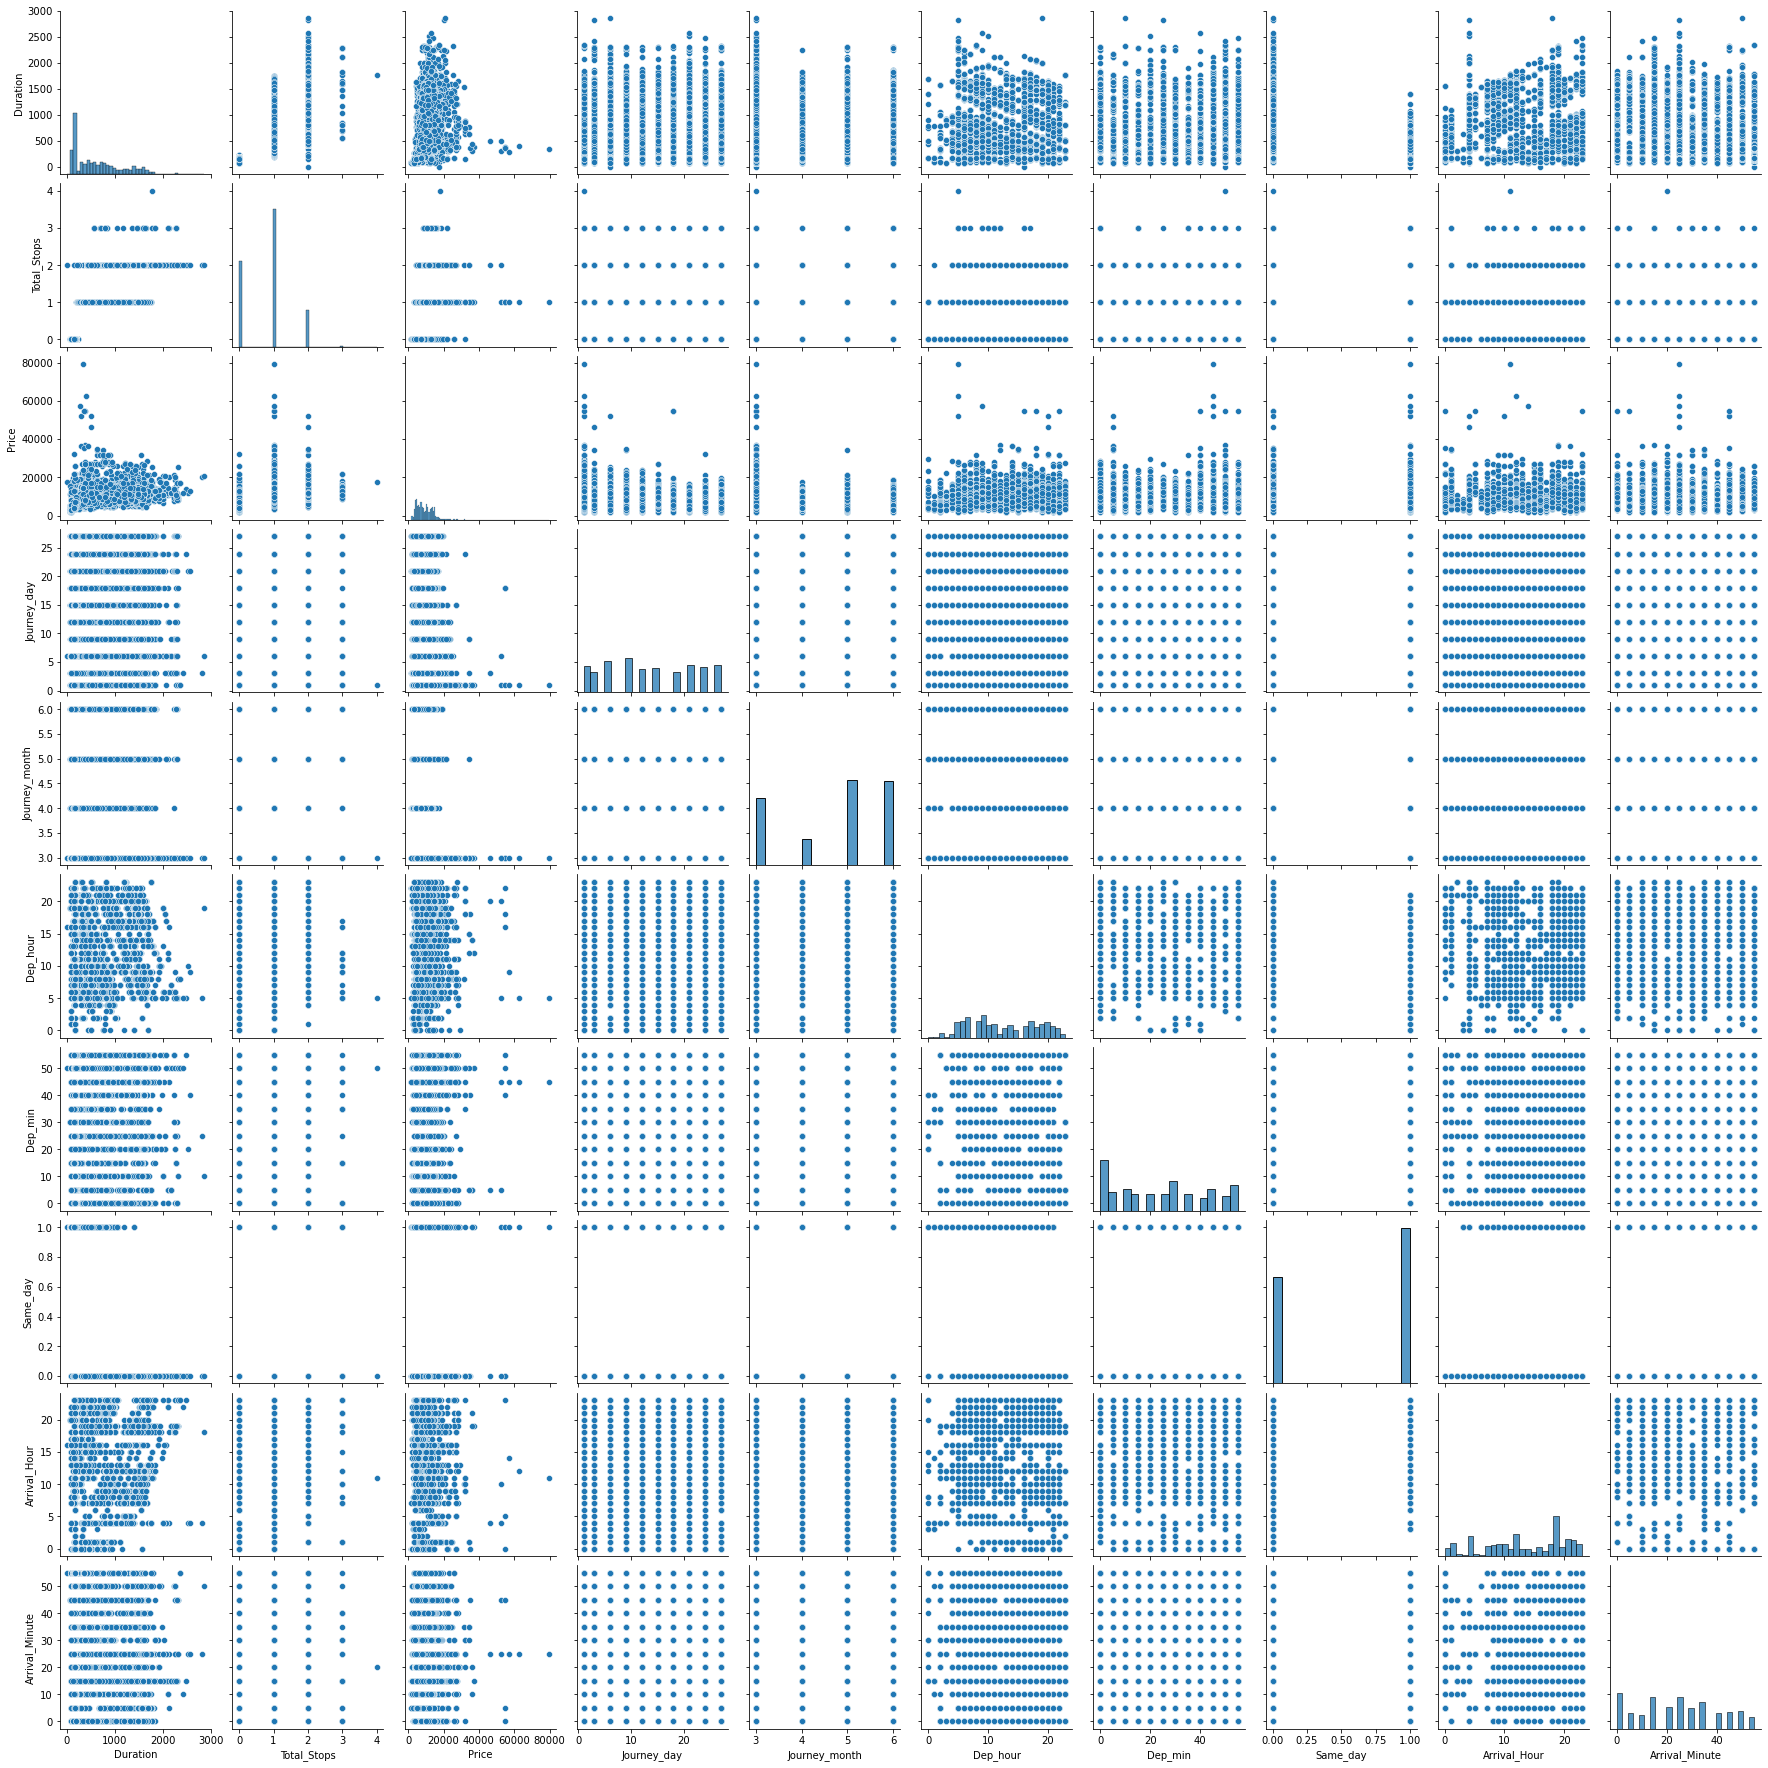

In [68]:
sns.pairplot(data)

<h2>Handling Outliers</h2>

In [69]:
num_cols.remove('Price')

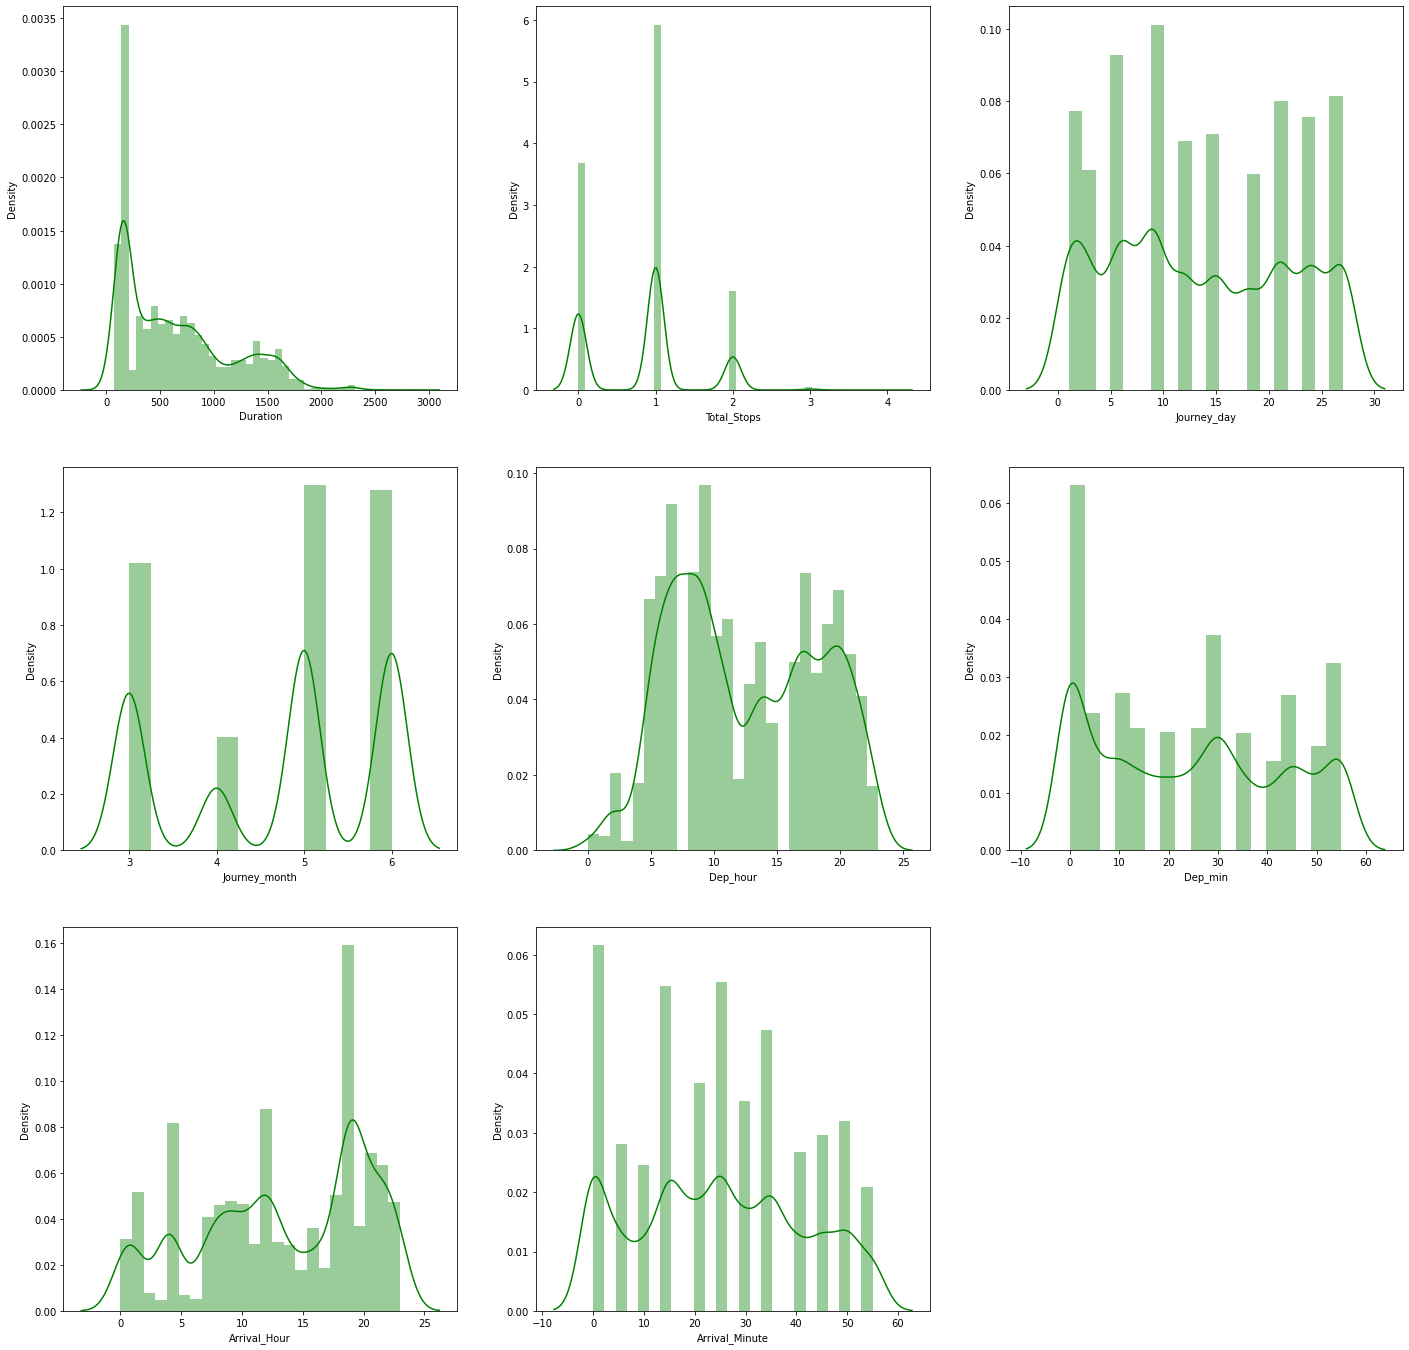

In [72]:
X = data[num_cols]

plt.figure(figsize=(24,24))
plotnumber=1
for col in X.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

In [73]:
X.skew()

Duration          0.861411
Total_Stops       0.317109
Journey_day       0.118174
Journey_month    -0.387409
Dep_hour          0.112924
Dep_min           0.167234
Arrival_Hour     -0.370146
Arrival_Minute    0.110945
dtype: float64

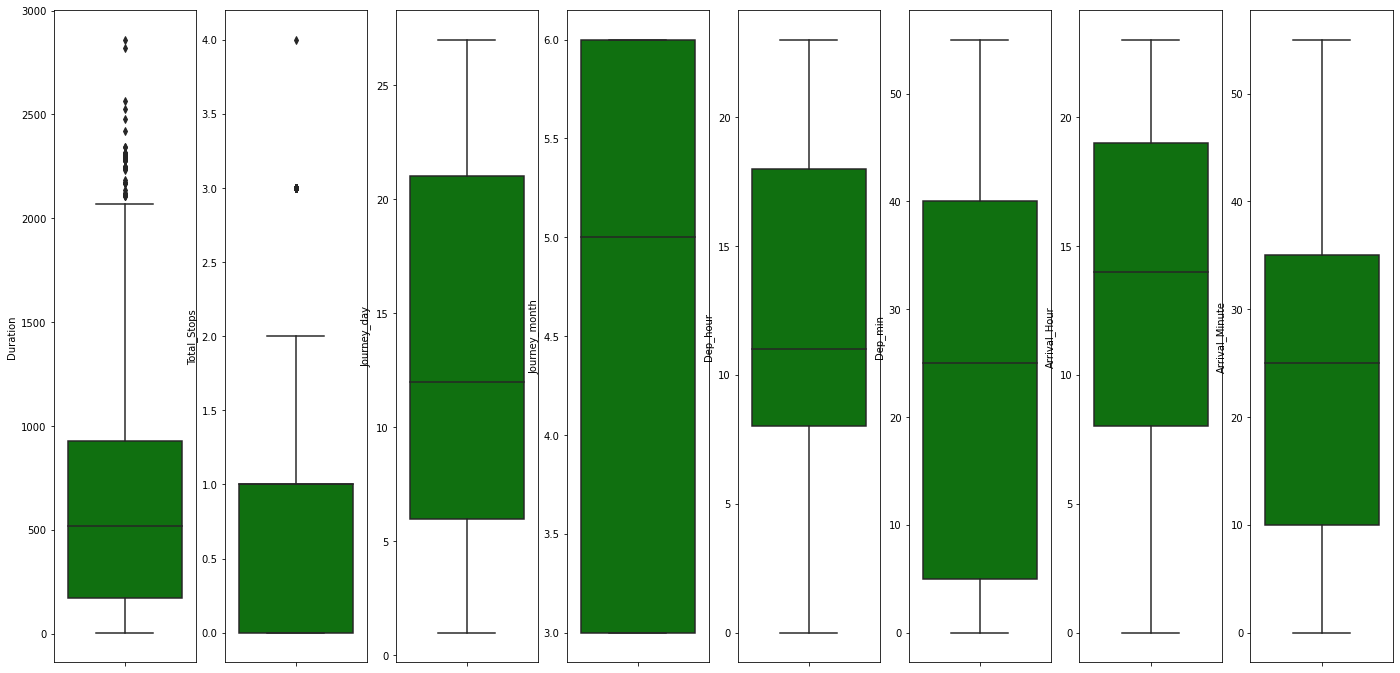

In [76]:
plt.figure(figsize=(24,12))
plotnumber=1
for col in X.columns:
    plt.subplot(1,8,plotnumber)
    sns.boxplot(y=X[col], color='green')
    plotnumber+=1

In [77]:
from scipy.stats import zscore
z = np.abs(zscore(X))

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

Old Shape (10682, 18)
New Shape (10583, 18)
Total Dropped Rows 99


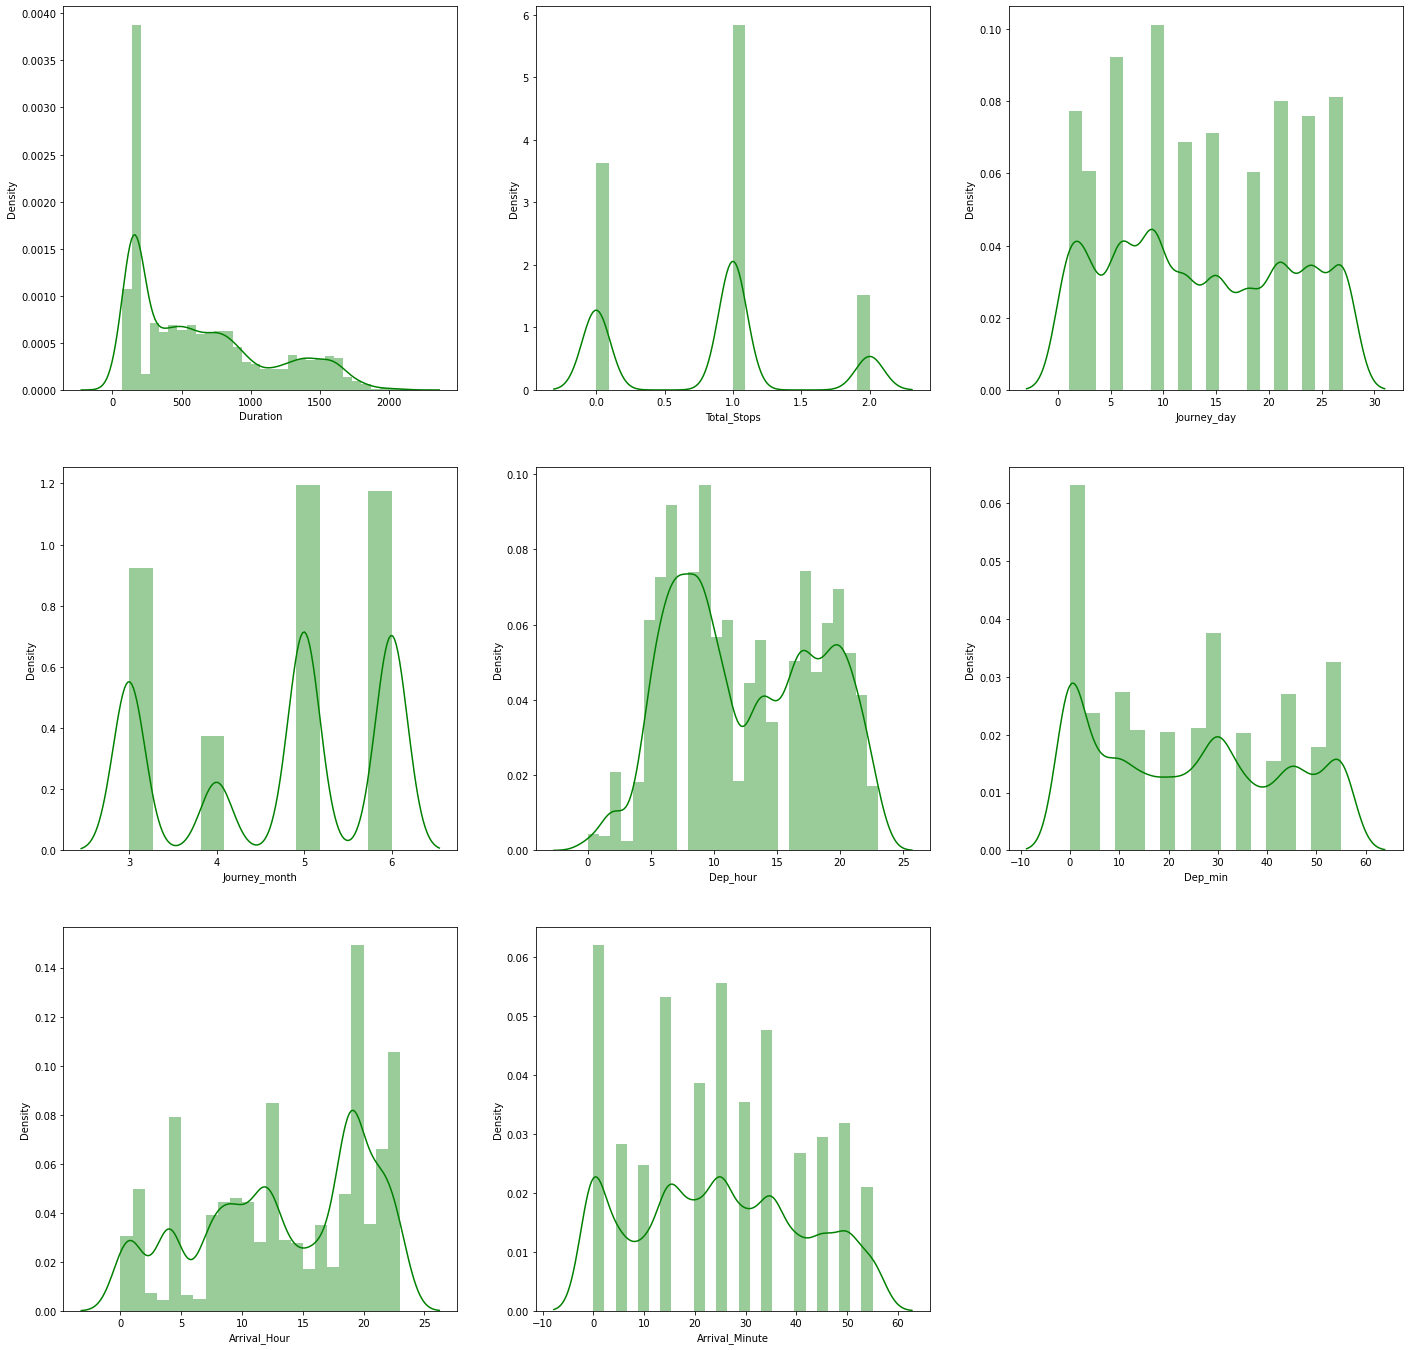

In [78]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in X.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [79]:
data_new[num_cols].skew()

Duration          0.775665
Total_Stops       0.223931
Journey_day       0.115429
Journey_month    -0.396832
Dep_hour          0.100933
Dep_min           0.166199
Arrival_Hour     -0.362019
Arrival_Minute    0.107319
dtype: float64

<h2>Encoding using get dummies</h2>

In [80]:
X = data_new.drop(columns=['Price'])
y = data_new.Price

In [81]:
X

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,0,No info,24,3,NaN,NaN,NaN,NaN,22,20,0,1,10
1,Air India,Kolkata,Banglore,445,2,No info,1,5,IXR,BBI,NaN,NaN,5,50,1,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,9,6,LKO,BOM,NaN,NaN,9,25,0,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,12,5,NAG,NaN,NaN,NaN,18,5,1,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,1,3,NAG,NaN,NaN,NaN,16,50,1,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0,No info,9,4,NaN,NaN,NaN,NaN,19,55,1,22,25
10679,Air India,Kolkata,Banglore,155,0,No info,27,4,NaN,NaN,NaN,NaN,20,45,1,23,20
10680,Jet Airways,Banglore,Delhi,180,0,No info,27,4,NaN,NaN,NaN,NaN,8,20,1,11,20
10681,Vistara,Banglore,New Delhi,160,0,No info,1,3,NaN,NaN,NaN,NaN,11,30,1,14,10


In [82]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10583, dtype: int64

In [83]:
X = pd.get_dummies(X)

In [85]:
X.shape

(10583, 101)

In [171]:
X

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute,Airline_Air Asia,...,stop_2_ ISK,stop_2_ IXC,stop_2_ JDH,stop_2_ MAA,stop_2_ NAG,stop_2_ PNQ,stop_2_ TRV,stop_2_ UDR,stop_2_ VGA,stop_2_ VTZ
0,-1.056456,-1.293278,1.163944,-1.408358,1.543667,0.022413,-1.221664,-1.788749,-0.775161,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
1,-0.046322,1.642080,-1.716882,0.153068,-1.364695,1.179456,0.818556,-0.048619,-0.432090,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
2,1.070386,1.642080,-0.408010,1.174209,-0.560579,0.255291,-1.221664,-1.357157,0.156891,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
3,-0.390214,0.374382,-0.043998,0.153068,0.948901,-0.934626,0.818556,1.416545,0.420512,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
4,-0.529838,0.374382,-1.716882,-1.408358,0.637152,1.179456,0.818556,1.122879,0.669602,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,-1.178723,-1.293278,-0.408010,-0.707555,1.100946,1.334580,0.818556,1.269678,0.156891,5.672349,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
10579,-1.146888,-1.293278,1.427030,-0.707555,1.250662,1.016643,0.818556,1.416545,-0.125207,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
10580,-0.999943,-1.293278,1.427030,-0.707555,-0.750439,0.022413,0.818556,-0.340500,-0.125207,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839
10581,-1.115932,-1.293278,-1.716882,-1.408358,-0.197523,0.466968,0.818556,0.097494,-0.775161,-0.176294,...,-0.019445,-0.009721,-0.023817,-0.089982,-0.030754,-0.030754,-0.013748,-0.016839,-0.036395,-0.016839


<h2>PreProcessing</h2>

In [86]:
from sklearn.preprocessing import power_transform
cols = X.columns
X = power_transform(X, method='yeo-johnson')
X = pd.DataFrame(X, columns=cols)

In [87]:
X.isnull().sum()

Duration         0
Total_Stops      0
Journey_day      0
Journey_month    0
Dep_hour         0
                ..
stop_2_ PNQ      0
stop_2_ TRV      0
stop_2_ UDR      0
stop_2_ VGA      0
stop_2_ VTZ      0
Length: 101, dtype: int64

In [88]:
X[num_cols].skew()

Duration         -0.048477
Total_Stops      -0.071888
Journey_day      -0.204695
Journey_month    -0.218849
Dep_hour         -0.106907
Dep_min          -0.359777
Arrival_Hour     -0.353761
Arrival_Minute   -0.350083
dtype: float64

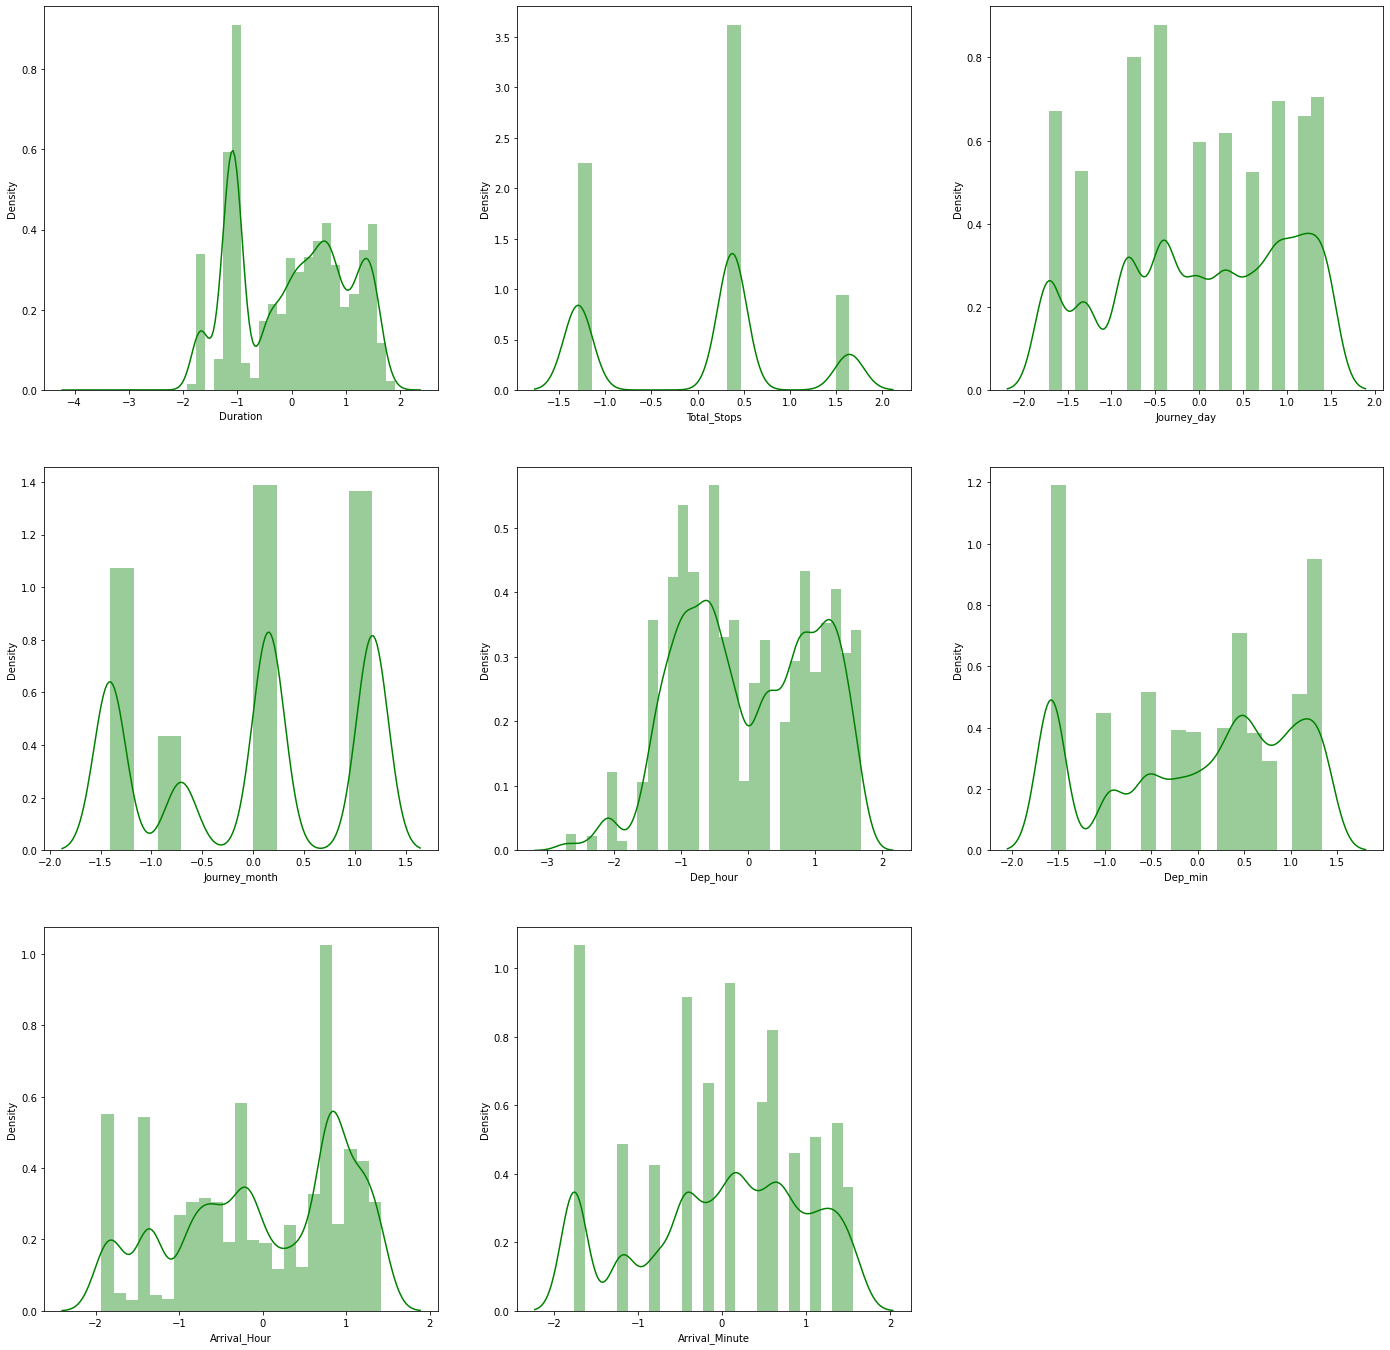

In [89]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

<h2>Scaling</h2>

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(X, columns=cols)


In [92]:
X[num_cols].mean()

Duration         -1.024842e-16
Total_Stops       4.012035e-16
Journey_day      -1.141380e-17
Journey_month     1.401941e-16
Dep_hour          1.466327e-16
Dep_min          -5.690116e-16
Arrival_Hour      1.459036e-16
Arrival_Minute    1.282217e-16
dtype: float64

<h2>Checking For MultiCollinearity</h2>

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(6, 'vif')

,vif,Features
0,3.539060,Duration
1,3.535221,Total_Stops
7,1.070915,Arrival_Minute
6,1.045533,Arrival_Hour
3,1.023095,Journey_month
4,1.016201,Dep_hour


<strong>No Multicollinearity Problem</strong>

<h2>Building and Training Models</h2>

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)
print(X_train.shape)
print(X_test.shape)

(7408, 101)
(3175, 101)


<h3>Linear Regression</h3>

Cross Val Scores [-3.40807122e+19 -3.10999205e+24 -1.11382948e+25 -1.92691217e+24
 -1.41496450e+26]
Corss Validation Score Mean===> -3.1534336542357928e+25
________________________________
Training R2 Score : 0.7392823700455808
Training MSE      : 5406793.131881714
Training MAE      : 1553.276535924001
Training RMSE     : 2325.2511975874163
________________________________
Testing R2 Score : -5.246875601130436e+24
Testing MSE      : 1.1701257808195525e+32
Testing MAE      : 316702379521527.9
Testing RMSE     : 1.0817235232810428e+16


Text(0.5, 1.0, 'Training Data')

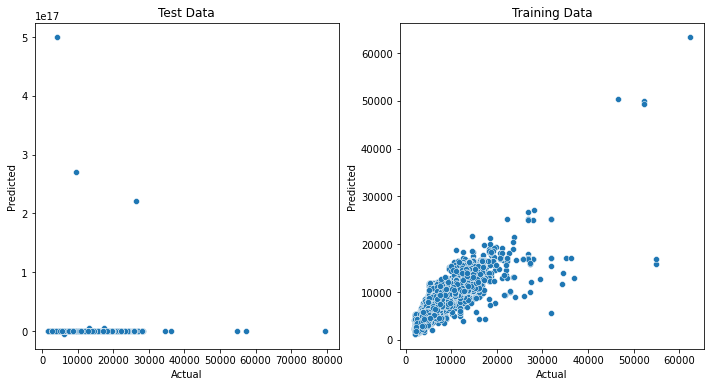

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print('Cross Val Scores', cross_val_score(lr, X_train, y_train, cv=5, scoring='r2'))
print("Corss Validation Score Mean===>", cross_val_score(lr, X_train, y_train, cv=5).mean())
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

HyperParamter Tuning

In [101]:
lrcv = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lrcv, param_grid = grid_parmas, cv=3, verbose=3)
grid_lr.fit(X_train, y_train)

print('Best Score -:', grid_lr.best_score_)
print('Best Params -:', grid_lr.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END fit_intercept=True, positive=True;, score=-4257674888410609469095936.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, positive=True;, score=-8484828024017433128861696.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=True;, score=-11697076274615121090522906624.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, positive=False;, score=-64952264037963340447744.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, positive=False;, score=-5461374596496872060223488.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=False;, score=-10634177784481644103598080.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=True;, score=-6305478311786322944.000 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=True;, score=-2190269091000623616.000 total time=   0.0s
[CV 3/3] END fit_intercept=False, positive=True;, score=-14703.780 total time=   0.0s
[CV 1/3] END fit_i

Corss Validation Score Mean===> -3.1534336542357928e+25
________________________________
Training R2 Score : 0.7392823700455808
Training MSE      : 5406793.131881714
Training MAE      : 1553.276535924001
Training RMSE     : 2325.2511975874163
________________________________
Testing R2 Score : -5.246875601130436e+24
Testing MSE      : 1.1701257808195525e+32
Testing MAE      : 316702379521527.9
Testing RMSE     : 1.0817235232810428e+16


Text(0.5, 1.0, 'Training Data')

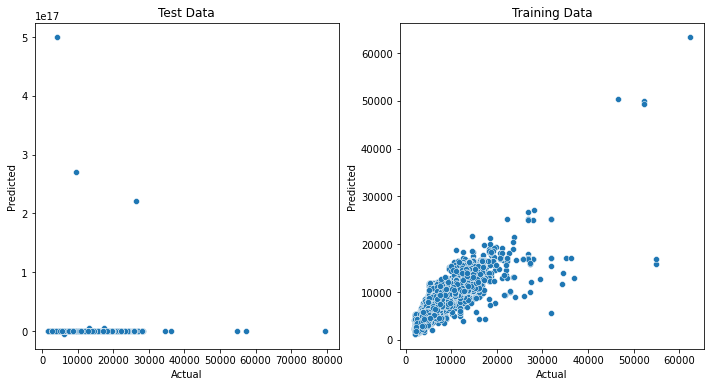

In [102]:
lrcv =  LinearRegression(positive=False, fit_intercept=True)

print("Corss Validation Score Mean===>", cross_val_score(lrcv, X_train, y_train, cv=5).mean())
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lrcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is clearly overfitting on training data</strong>

<h3>KNeighbors Regressor</h3>

Corss Validation Score Mean===> 0.8015531252554562
________________________________
Training R2 Score : 0.8880445376959263
Training MSE      : 2321745.655512959
Training MAE      : 742.0831803455723
Training RMSE     : 1523.727552915205
________________________________
Testing R2 Score : 0.8092483662227825
Testing MSE      : 4254025.088151181
Testing MAE      : 1013.3666771653544
Testing RMSE     : 2062.5288090475683


Text(0.5, 1.0, 'Training Data')

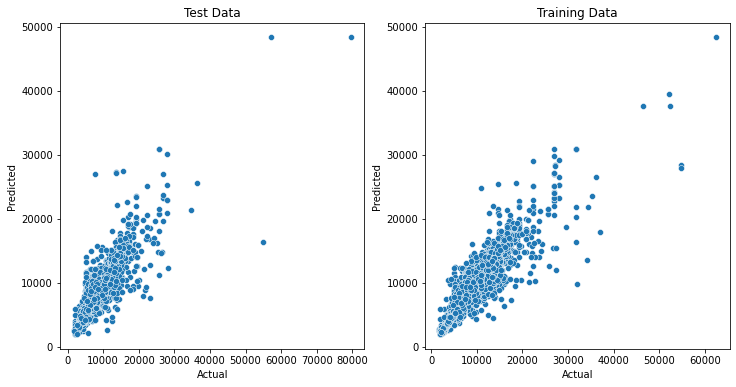

In [103]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print("Corss Validation Score Mean===>", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

HyperParameter Tuning

In [105]:
knncv = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13,15,17,19,21],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score -:', grid_knn.best_score_)
print('Best Params -:', grid_knn.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Score -: 0.8179939562247472
Best Params -: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


Corss Validation Score Mean===> 0.8208602598469031
________________________________
Training R2 Score : 0.995891877461443
Training MSE      : 85194.73244015478
Training MAE      : 38.31873200143989
Training RMSE     : 291.8813670657221
________________________________
Testing R2 Score : 0.8346780251133481
Testing MSE      : 3686908.5462822076
Testing MAE      : 940.7213627825956
Testing RMSE     : 1920.1324293605917


Text(0.5, 1.0, 'Training Data')

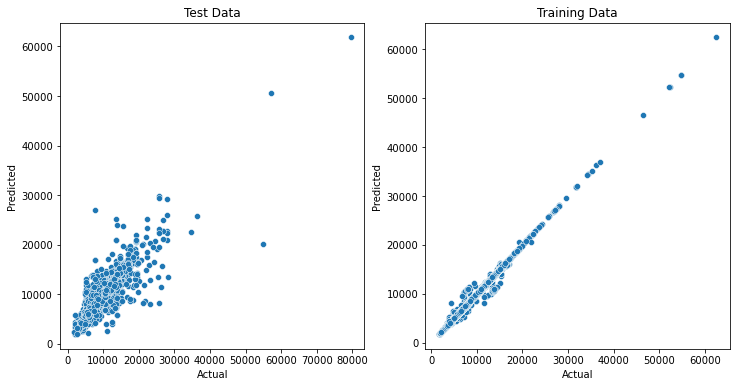

In [106]:
knncv = KNeighborsRegressor(n_neighbors=7, p=1,weights='distance')

print("Corss Validation Score Mean===>", cross_val_score(knncv, X_train, y_train, cv=5).mean())
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knncv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is better than Linear Regression</strong>

<h3>DecisionTree Regressor</h3>

Corss Validation Score Mean===> 0.8091441232203997
________________________________
Training R2 Score : 0.995891877461443
Training MSE      : 85194.73244015478
Training MAE      : 38.31873200143989
Training RMSE     : 291.8813670657221
________________________________
Testing R2 Score : 0.8602890530563151
Testing MSE      : 3115747.2238582675
Testing MAE      : 740.3327559055118
Testing RMSE     : 1765.1479325706011


Text(0.5, 1.0, 'Training Data')

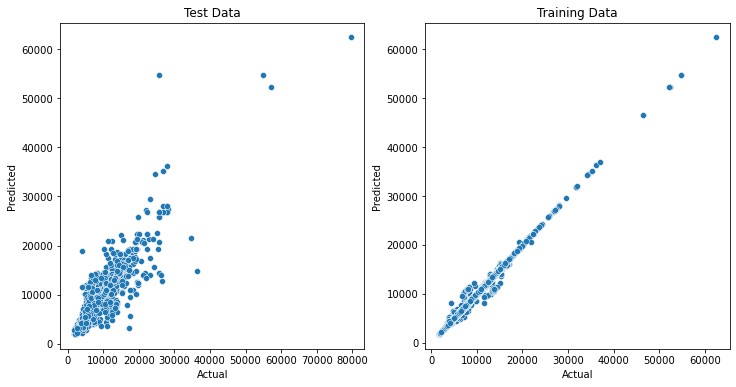

In [107]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
print("Corss Validation Score Mean===>", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dt.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

HyperParameter Tuning

In [109]:
dtcv = DecisionTreeRegressor()

param_grid = {
    'max_depth':[None,10,11,12,13,14,15],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_leaf_nodes':[None,85,90,95,100,105]
}

grid_dt = GridSearchCV(dtcv, param_grid = param_grid, cv=3)

grid_dt.fit(X_train, y_train)
print('Best Score -->', grid_dt.best_score_)
print('Best Params -->', grid_dt.best_params_)

Best Score --> 0.8378059914038821
Best Params --> {'max_depth': 13, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 3}


Corss Validation Score Mean===> 0.831207822411909
________________________________
Training R2 Score : 0.9449878302593283
Training MSE      : 1140848.9006891306
Training MAE      : 474.87295923404156
Training RMSE     : 1068.1052853951855
________________________________
Testing R2 Score : 0.8391337084093311
Testing MSE      : 3587540.650182795
Testing MAE      : 798.3376890736223
Testing RMSE     : 1894.0804233671797


Text(0.5, 1.0, 'Training Data')

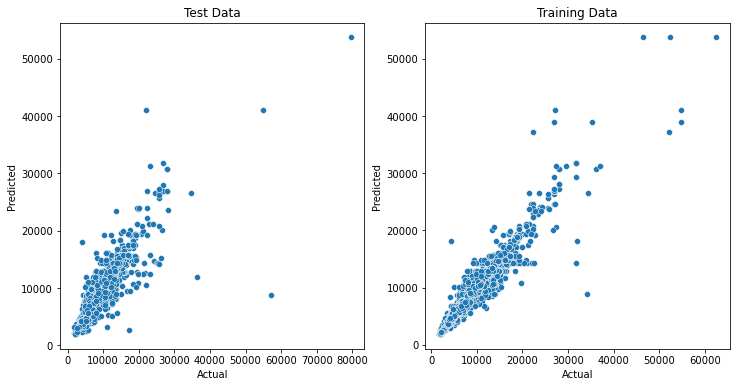

In [110]:
dtcv = DecisionTreeRegressor(max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=3, max_depth=13)

print("Corss Validation Score Mean===>", cross_val_score(dtcv, X_train, y_train, cv=5).mean())
dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dtcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is better than KNN as it has low difference between Test Score and SV Score</strong>

<h3>AdaBoost Regressor</h3>

Corss Validation Score Mean===> 0.23623416619567875
________________________________
Training R2 Score : 0.3424512447362912
Training MSE      : 13636324.073898444
Training MAE      : 3118.8985518623845
Training RMSE     : 3692.7393725929865
________________________________
Testing R2 Score : 0.3202793874983595
Testing MSE      : 15158709.161529712
Testing MAE      : 3187.3491834723704
Testing RMSE     : 3893.4186984615094


Text(0.5, 1.0, 'Training Data')

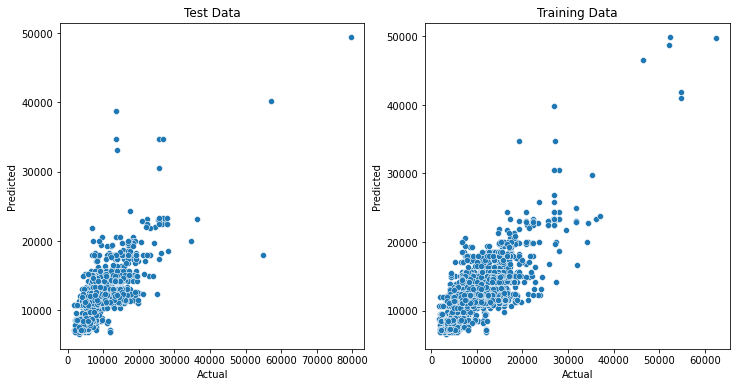

In [111]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

print("Corss Validation Score Mean===>", cross_val_score(ad, X_train, y_train, cv=5).mean())
ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')


HyperParameter Tuning

In [112]:
adcv = AdaBoostRegressor()

grid_params = {
    'n_estimators':[10,20,30,50,100, 150],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8],
    'loss' : ['linear', 'square', 'exponential']
}

grid_ad = GridSearchCV(adcv, param_grid = grid_params, cv=3, n_jobs=-1, verbose=3)
grid_ad.fit(X_train,y_train)
print('Best Score -->', grid_ad.best_score_)
print('Best Params -->', grid_ad.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Score --> 0.6041336592276539
Best Params --> {'learning_rate': 0.005, 'loss': 'exponential', 'n_estimators': 20}


Corss Validation Score Mean===> 0.5824615135627937
________________________________
Training R2 Score : 0.6119459692019039
Training MSE      : 8047510.51505406
Training MAE      : 1899.341444176942
Training RMSE     : 2836.8134438228503
________________________________
Testing R2 Score : 0.5551656494725669
Testing MSE      : 9920420.862162754
Testing MAE      : 2003.7028004827428
Testing RMSE     : 3149.6699608312542


Text(0.5, 1.0, 'Training Data')

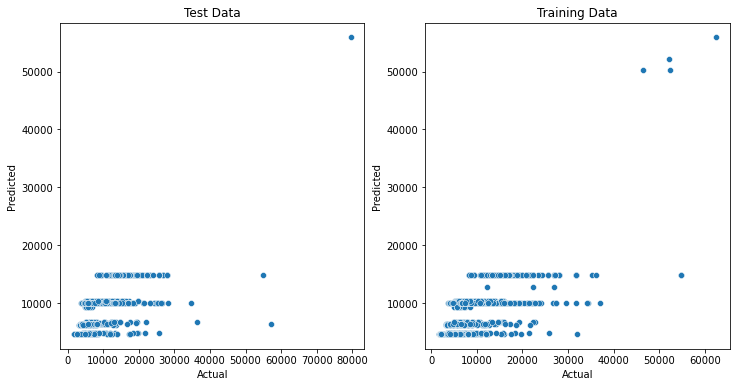

In [113]:
adcv = AdaBoostRegressor(learning_rate=0.005, loss='exponential', n_estimators=20)
print("Corss Validation Score Mean===>", cross_val_score(adcv, X_train, y_train, cv=5).mean())
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = adcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>DecisionTree model was performing better than this model</strong>

<h3>XGBRegressor</h3>

Corss Validation Score Mean===> 0.8944218427271637
________________________________
Training R2 Score : 0.9665821864785172
Training MSE      : 693022.5802606648
Training MAE      : 500.10539412035024
Training RMSE     : 832.4797776887225
________________________________
Testing R2 Score : 0.8947171565676046
Testing MSE      : 2347952.929390822
Testing MAE      : 742.1629959707185
Testing RMSE     : 1532.3031453961132


Text(0.5, 1.0, 'Training Data')

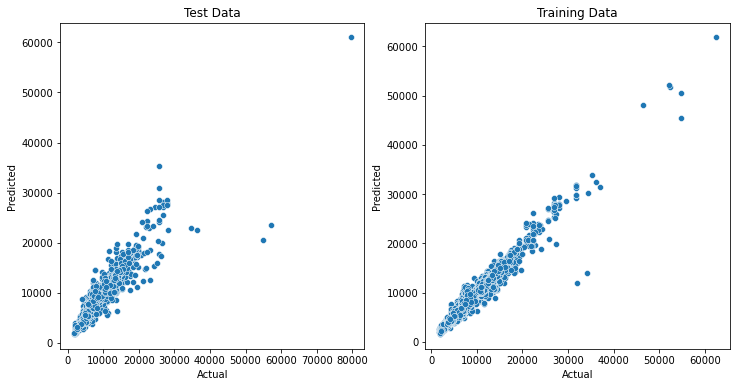

In [114]:
from xgboost import XGBRegressor

xg = XGBRegressor()

print("Corss Validation Score Mean===>", cross_val_score(xg, X_train, y_train, cv=5).mean())
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

In [116]:
xgcv = XGBRegressor()

grid_params = {
    'n_estimators':[10,20,50,100,150, 180,200],
    'max_depth':[6,7,8,9,10,11,12,13],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xgcv, param_grid=grid_params, cv=3, n_jobs=-1, verbose=3)
grid_xg.fit(X_train, y_train)

print('Best Score -->', grid_xg.best_score_)
print('Best Params -->', grid_xg.best_params_)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
Best Score --> 0.8926238959340481
Best Params --> {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180, 'n_jobs': -1}


Corss Validation Score Mean===> 0.9037385785575207
________________________________
Training R2 Score : 0.9822407371129697
Training MSE      : 368293.70005267515
Training MAE      : 356.86955187078684
Training RMSE     : 606.8720623431888
________________________________
Testing R2 Score : 0.9120138536479858
Testing MSE      : 1962212.6771839682
Testing MAE      : 651.3224695112574
Testing RMSE     : 1400.790018947868


Text(0.5, 1.0, 'Training Data')

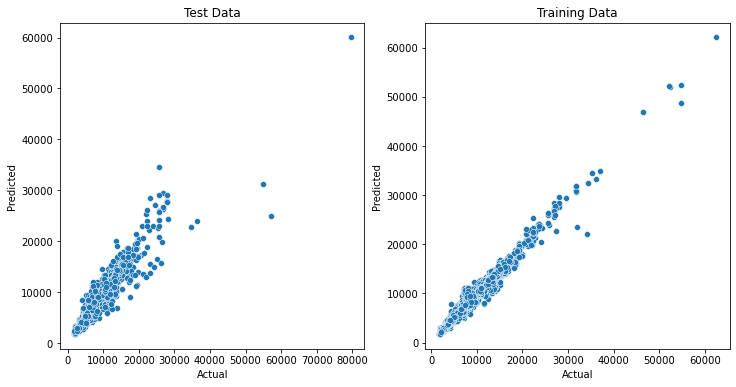

In [117]:
xgcv = XGBRegressor(learning_rate=0.1, max_depth=9, n_estimators=180)
print("Corss Validation Score Mean===>", cross_val_score(xgcv, X_train, y_train, cv=5).mean())
xgcv.fit(X_train, y_train)

y_pred_train = xgcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>XGB is the best performing model</strong>

<h2>Model Saving</h2>

In [118]:
import pickle
pickle.dump(xgcv, open('model.pickle','wb'))

<h2>Predicting For Test DataSet</h2>

In [139]:
test_data = pd.read_csv('Test_set.csv')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [140]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<strong>No Null Values</strong>

In [141]:
journey_day = []
journey_month = []
journey_year = []
for date in test_data.Date_of_Journey:
    day = int(date.split('/')[0])
    month = int(date.split('/')[1])
    year = int(date.split('/')[2])
    journey_day.append(day)
    journey_month.append(month)
    journey_year.append(year)
    
test_data['Journey_day'] = journey_day
test_data['Journey_month'] = journey_month
test_data['Journey_year'] = journey_year

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Journey_year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [142]:
test_data = test_data.drop(columns=['Date_of_Journey', 'Journey_year'])

In [143]:
test_data.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [144]:
stop_1 = []
stop_2 = []
stop_3 = []
stop_4 = []
for route in test_data.Route:
    rl = route.split('→')
    if len(rl)==2:
        stop_1.append(np.nan)
        stop_2.append(np.nan)
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==3:
        stop_1.append(rl[1])
        stop_2.append(np.nan)
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==4:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(np.nan)
        stop_4.append(np.nan)
    if len(rl)==5:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(rl[3])
        stop_4.append(np.nan)
    if len(rl)==6:
        stop_1.append(rl[1])
        stop_2.append(rl[2])
        stop_3.append(rl[3])
        stop_4.append(rl[4])
        
test_data['stop_1'] = stop_1
test_data['stop_2'] = stop_2
test_data['stop_3'] = stop_3
test_data['stop_4'] = stop_4


In [145]:
test_data = test_data.drop(columns=['Route'])

In [146]:
test_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,BOM,NaN,NaN,NaN
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,12,5,MAA,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,5,BOM,NaN,NaN,NaN
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,NaN,NaN,NaN,NaN


In [147]:
hours = []
mins = []
for time in test_data.Dep_Time:
    time = time.split(':')
    hours.append(int(time[0]))
    mins.append(int(time[1]))
    
test_data['Dep_hour'] = hours
test_data['Dep_min'] = mins
test_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,BOM,NaN,NaN,NaN,17,30
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,12,5,MAA,NaN,NaN,NaN,6,20
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,5,BOM,NaN,NaN,NaN,8,0
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,NaN,NaN,NaN,NaN,23,55


In [148]:
test_data = test_data.drop(columns=['Dep_Time'])

In [149]:
test_data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,No info,6,6,BOM,NaN,NaN,NaN,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,No info,12,5,MAA,NaN,NaN,NaN,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,No info,21,5,BOM,NaN,NaN,NaN,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,No info,24,6,NaN,NaN,NaN,NaN,23,55


In [150]:
Same_day = []
Arrival_Hour = []
Arrival_Minute = []

for arr in test_data.Arrival_Time:
    arr = arr.split(' ')
    if len(arr)>1:
        Same_day.append(0)
    else:
        Same_day.append(1)
        
    Arrival_Hour.append(int(arr[0].split(':')[0]))
    Arrival_Minute.append(int(arr[0].split(':')[1]))
    
test_data['Same_day'] = Same_day
test_data['Arrival_Hour'] = Arrival_Hour
test_data['Arrival_Minute'] = Arrival_Minute

test_data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1 stop,No info,6,6,BOM,NaN,NaN,NaN,17,30,0,4,25
1,IndiGo,Kolkata,Banglore,10:20,4h,1 stop,No info,12,5,MAA,NaN,NaN,NaN,6,20,1,10,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15,0,19,0
3,Multiple carriers,Delhi,Cochin,21:00,13h,1 stop,No info,21,5,BOM,NaN,NaN,NaN,8,0,1,21,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,non-stop,No info,24,6,NaN,NaN,NaN,NaN,23,55,0,2,45


In [151]:
test_data = test_data.drop(columns=['Arrival_Time'])

In [152]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,6,6,BOM,NaN,NaN,NaN,17,30,0,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,12,5,MAA,NaN,NaN,NaN,6,20,1,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15,0,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,21,5,BOM,NaN,NaN,NaN,8,0,1,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,No info,24,6,NaN,NaN,NaN,NaN,23,55,0,2,45


In [153]:
Duration = []
for dur in test_data.Duration:
    dur = dur.split(' ')
    if len(dur)==1:
        try:
            hour = int(dur[0].split('h')[0])
            dur = (hour*60)
        except:
            mins = int(dur[0].split('m')[0])
            dur = mins
    else:
        hour = int(dur[0].split('h')[0])
        mins = int(dur[1].split('m')[0])
        dur = (hour*60) +mins
    
    Duration.append(dur)
    
test_data['Duration'] = Duration

In [154]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,655,1 stop,No info,6,6,BOM,NaN,NaN,NaN,17,30,0,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,No info,12,5,MAA,NaN,NaN,NaN,6,20,1,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15,0,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,No info,21,5,BOM,NaN,NaN,NaN,8,0,1,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,No info,24,6,NaN,NaN,NaN,NaN,23,55,0,2,45


In [156]:
test_data['Total_Stops'] = test_data['Total_Stops'].replace({
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
})

test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,stop_1,stop_2,stop_3,stop_4,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,655,1,No info,6,6,BOM,NaN,NaN,NaN,17,30,0,4,25
1,IndiGo,Kolkata,Banglore,240,1,No info,12,5,MAA,NaN,NaN,NaN,6,20,1,10,20
2,Jet Airways,Delhi,Cochin,1425,1,In-flight meal not included,21,5,BOM,NaN,NaN,NaN,19,15,0,19,0
3,Multiple carriers,Delhi,Cochin,780,1,No info,21,5,BOM,NaN,NaN,NaN,8,0,1,21,0
4,Air Asia,Banglore,Delhi,170,0,No info,24,6,NaN,NaN,NaN,NaN,23,55,0,2,45


In [157]:
test_data = pd.get_dummies(test_data)

In [158]:
test_data.shape

(2671, 100)

In [160]:
not_in_original = [col for col in test_data.columns if col not in X.columns]
test_data = test_data.drop(columns=not_in_original)

In [161]:
test_data.shape

(2671, 91)

In [163]:
not_in_new = [col for col in X.columns if col not in test_data.columns]
print(not_in_new)

['Airline_Trujet', 'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover', 'Additional_Info_No Info', 'Additional_Info_Red-eye flight', 'stop_1_ IXA ', 'stop_1_ IXZ ', 'stop_1_ JLR ', 'stop_1_ NDC ', 'stop_1_ VTZ ']


In [164]:
for col in not_in_new:
    test_data[col] = np.zeros(shape=(2671))

In [165]:
not_in_new = [col for col in X.columns if col not in test_data.columns]
print(not_in_new)

[]


In [166]:
not_in_original = [col for col in test_data.columns if col not in X.columns]
print(not_in_original)

[]


In [169]:
test_data = test_data[X.columns]

In [170]:
test_data

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute,Airline_Air Asia,...,stop_2_ ISK,stop_2_ IXC,stop_2_ JDH,stop_2_ MAA,stop_2_ NAG,stop_2_ PNQ,stop_2_ TRV,stop_2_ UDR,stop_2_ VGA,stop_2_ VTZ
0,655,1,6,6,17,30,0,4,25,0,...,0,0,0,0,0,0,0,0,0,0
1,240,1,12,5,6,20,1,10,20,0,...,0,0,0,0,0,0,0,0,0,0
2,1425,1,21,5,19,15,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,780,1,21,5,8,0,1,21,0,0,...,0,0,0,0,0,0,0,0,0,0
4,170,0,24,6,23,55,0,2,45,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,6,6,20,30,0,20,25,0,...,0,0,0,0,0,0,0,0,0,0
2667,155,0,27,3,14,20,1,16,55,0,...,0,0,0,0,0,0,0,0,0,0
2668,395,1,6,3,21,50,0,4,25,0,...,0,0,0,0,0,0,0,0,0,0
2669,915,1,6,3,4,0,1,19,15,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
test_data = power_transform(test_data, method='yeo-johnson')
test_data = pd.DataFrame(test_data, columns=X.columns)

In [174]:
test_data

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute,Airline_Air Asia,...,stop_2_ ISK,stop_2_ IXC,stop_2_ JDH,stop_2_ MAA,stop_2_ NAG,stop_2_ PNQ,stop_2_ TRV,stop_2_ UDR,stop_2_ VGA,stop_2_ VTZ
0,0.354559,0.296761,-0.778735,1.222810,0.784705,0.337883,-1.227041,-1.293453,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
1,-0.737638,0.296761,-0.019193,0.045608,-1.169484,-0.147949,0.814969,-0.645906,-0.214865,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2,1.362483,0.296761,0.974508,0.045608,1.109756,-0.399425,-1.227041,0.743989,-1.580256,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
3,0.568336,0.296761,0.974508,0.045608,-0.781800,-1.437604,0.814969,1.137926,-1.580256,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
4,-1.066721,-1.282430,1.280587,1.222810,1.740189,1.468998,-1.227041,-1.480391,1.188564,5.482530,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.372222,0.296761,-0.778735,1.222810,1.269719,0.337883,-1.227041,0.937535,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2667,-1.151480,-1.282430,1.576609,-1.332350,0.283230,-0.147949,0.814969,0.207335,1.736376,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2668,-0.223302,0.296761,-0.778735,-1.332350,1.428068,1.251218,-1.227041,-1.293453,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2669,0.770112,0.296761,-0.778735,-1.332350,-1.587854,-1.437604,0.814969,0.743989,-0.499704,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353


In [175]:
test_data = sc.transform(test_data)
test_data = pd.DataFrame(test_data, columns=X.columns)

In [176]:
test_data

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute,Airline_Air Asia,...,stop_2_ ISK,stop_2_ IXC,stop_2_ JDH,stop_2_ MAA,stop_2_ NAG,stop_2_ PNQ,stop_2_ TRV,stop_2_ UDR,stop_2_ VGA,stop_2_ VTZ
0,0.354559,0.296761,-0.778735,1.222810,0.784705,0.337883,-1.227041,-1.293453,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
1,-0.737638,0.296761,-0.019193,0.045608,-1.169484,-0.147949,0.814969,-0.645906,-0.214865,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2,1.362483,0.296761,0.974508,0.045608,1.109756,-0.399425,-1.227041,0.743989,-1.580256,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
3,0.568336,0.296761,0.974508,0.045608,-0.781800,-1.437604,0.814969,1.137926,-1.580256,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
4,-1.066721,-1.282430,1.280587,1.222810,1.740189,1.468998,-1.227041,-1.480391,1.188564,5.482530,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.372222,0.296761,-0.778735,1.222810,1.269719,0.337883,-1.227041,0.937535,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2667,-1.151480,-1.282430,1.576609,-1.332350,0.283230,-0.147949,0.814969,0.207335,1.736376,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2668,-0.223302,0.296761,-0.778735,-1.332350,1.428068,1.251218,-1.227041,-1.293453,0.067709,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353
2669,0.770112,0.296761,-0.778735,-1.332350,-1.587854,-1.437604,0.814969,0.743989,-0.499704,-0.182398,...,-0.019353,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353


<h2>Predicting</h2>

In [178]:
predictions = xgcv.predict(test_data)
predictions

array([14584.006 ,  4413.2876, 12691.338 , ..., 15912.148 , 13777.416 ,
        8107.131 ], dtype=float32)

In [179]:
test_data['PredictedPrice'] = predictions

In [180]:
test_data

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Same_day,Arrival_Hour,Arrival_Minute,Airline_Air Asia,...,stop_2_ IXC,stop_2_ JDH,stop_2_ MAA,stop_2_ NAG,stop_2_ PNQ,stop_2_ TRV,stop_2_ UDR,stop_2_ VGA,stop_2_ VTZ,PredictedPrice
0,0.354559,0.296761,-0.778735,1.222810,0.784705,0.337883,-1.227041,-1.293453,0.067709,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,14584.005859
1,-0.737638,0.296761,-0.019193,0.045608,-1.169484,-0.147949,0.814969,-0.645906,-0.214865,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,4413.287598
2,1.362483,0.296761,0.974508,0.045608,1.109756,-0.399425,-1.227041,0.743989,-1.580256,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,12691.337891
3,0.568336,0.296761,0.974508,0.045608,-0.781800,-1.437604,0.814969,1.137926,-1.580256,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,11157.081055
4,-1.066721,-1.282430,1.280587,1.222810,1.740189,1.468998,-1.227041,-1.480391,1.188564,5.482530,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,3261.012451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1.372222,0.296761,-0.778735,1.222810,1.269719,0.337883,-1.227041,0.937535,0.067709,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,9736.908203
2667,-1.151480,-1.282430,1.576609,-1.332350,0.283230,-0.147949,0.814969,0.207335,1.736376,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,3997.911865
2668,-0.223302,0.296761,-0.778735,-1.332350,1.428068,1.251218,-1.227041,-1.293453,0.067709,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,15912.148438
2669,0.770112,0.296761,-0.778735,-1.332350,-1.587854,-1.437604,0.814969,0.743989,-0.499704,-0.182398,...,-0.027374,-0.019353,-0.080034,-0.047449,-0.019353,-0.019353,-0.019353,-0.038727,-0.019353,13777.416016
